# Resposta às dúvidas enviadas pela população sobre a votação de São Mateus


Este relatório tem por objetivo sanar as dúvidas enviadas pela população sobre o resultado da eleição das propostas para a <b> Proposta de Lei Orçamentária 2022 </b> no processo participativo do <b> Orçamento Cidadão </b> da Prefeitura Municipal de São Paulo. Realizado por meio da Plataforma Participe + (<i> https://participemais.prefeitura.sp.gov.br/budgets </i>, o orçamento cidadão contemplou as seguintes etapas:
    
* Recepção das propostas
10 Abril, 2021 - 10 Maio, 2021

Etapa na qual a sociedade civil pôde enviar propostas para a PLOA 2022, regionalizadas por Subprefeitura.

* Priorização das propostas
11 Maio, 2021 - 24 Junho, 2021

Etapa na qual os Conselhos Participativos Municipais das Subprefeituras que receberam mais de 15 propostas analisaram e priorizaram até 15 propostas entre as enviadas pela população na etapa de Recepção de Propostas para participarem da Votação Popular. Caso o número de propostas recebidas na etapa Recepção de Propostas tenha sido menor do que 15, todas as propostas vão a Votação Popular.

* Votação popular
25 Junho, 2021 - 18 Julho, 2021
    
Etapa na qual indivíduos puderam votar, por meio da plataforma Participe +, em até 5 propostas diferentes que considerem mais importantes para o orçamento do ano que vem. Nesta etapa, a votação só pode ser enviada após ser realizado o cadastro completo na Plataforma.

Na Subprefeitura de São Mateus, a votação foi acirrada, e a Prefeitura recebeu uma série de questionamentos sobre seus resultados. Copio trechos de alguns deseses questionamentos abaixo, sem identificar os autores, é claro:

* <i> Como assim?? Acompanhamos as propostas por São Mateus, referente PLOA 2022 e, as duas propostas que se classificaram no 4° e 5° lugar, estavam bem em colocação diversas. Como passaram a frente se, outras estavam nestas colocações? É possível ser verificado e apresentado se ocorreu algum erro? E,em que momento estas pularam pra estas colocações? Assim, você saberia nos dizer se SGM ou SF seria a competente para a resposta? Caso seja SGM, haveria viabilidade de apresentação de minuta até dia 30/07? Muito obrigado! <i/>


* <i> (...) Até por volta das badaladas da virada das 00h tinhamos duas propostas no 4° e 5° lugar, que não eram as que figuram como "eleitas". Estas que agora figuram não tinham mais que 85 votos,  uma sequer 80 tinha e agora estão no 4° e 5° lugar? Pede-se verificação desta votação, em que momento isto ocorreu? Pode ter erro? (...) </i>
    
* <i>  Venho por meio desta, ratificar posição que emanei (...) para indagarem a verificação - Auditoria - na votação PLOA 2O21, pois acompanhei até os últimos instantes e as propostas que se verificam como Eleitas na ordem da Quarta e Quinta posição NÃO CONZIDEM, com o que se apresentava, se via no site Participe+, até às 23:59 de 18 de Julho de 2021. Estranhamente as que estão hoje, na posição sexta e sétima, como não eleitas, eram as que "deveriam figurar como quarto e quinto lugar". Algo ocorreu de muito estranho. </i>
    
* <i>Senhores, acompanhamos as propostas por São Mateus, referente ORÇAMENTO CIDADÃO 2022 e, as duas propostas que se classificaram no 4° e 5° lugar, estavam em colocação diversas, outras figuravam no lugar antes das 23:30h. Solicitamos a apresentação e verificação de votos., pois outras figuravam. Estas que ora se classificaram como 4° e 5° lugar deram um "salto" de +50votos... Estávamos acompanhando e as 00h de 19/7 deu este resultado? Solicita-se a veracidade dos votos e reavaliação. Aguarda-se posição. </i>
    
    
Boa parte dos questionamentos solicita o envio dos CPFs e e-mails dos usuários que votaram em São Mateus. Nós, da Prefeitura, não podemos fazê-lo, uma vez que o voto é <b> secreto </b> e estaríamos também infringindo a Lei Geral de Proteção de Dados (LGPD) ao encaminhar estes dados pessoais. 
    
De todo modo, ressaltamos que a <b> transparência </b> é um de nossos valores fundamentais e que <b> toda participação é bem-vinda </b>.
    
Assim, nesse relatório, buscamos alcançar dois objetivos principais:
    
1. Anonimizar os microdados das votações da Subprefeitura de São Mateus realizadas na Plataforma Participe+ para o Orçamento Participativo PLOA 2022, para permitir sua abertura como dados abertos.
    
2. Analisar o andamento da votação na Subprefeitura de São Mateus, endereçando os questionamentos enviados pelos munícipes, sobretudo sobre as duas propostas mencionadas que figuravam em 3º e 4º lugar [<sup>1</sup>](#fn1)
    
    
<span id="fn1"> <font size="-3"> 1. Não fazem parte do escopo deste relatório possíveis avaliações, do ponto de vista da Segurança da Informação, sobre a plataforma Participe+, como testes de penetração (<i> pentests </i>), uma vez que estas escapam às competências de seu autor. No entanto, em primeiro lugar, cumpre ressaltar que a plataforma se trata de uma implementação de software de código aberto utilizado por diversos países e organização ao redor do mundo, com o endosso da Organização das Nações Unidas. Mais informações podem ser encontradas em https://consulproject.org/en/. </font></span>    
    

## Parte 1: Anonimização dos dados

A seguir, realizaremos a anonimização dos dados das votações.

Isto nos permitirá:
* Colocar os microdados das votações de São Mateus em transparência, conforme solicitado pela população;
* Realizar as análises neste documento de forma segura, de modo que podemos inspecionar os dados sem "vazar" informações pessoais.

Abaixo, importamos as bibliotecas que utilizaremos em ambas as partes, de análise e anonimização:

In [1]:
#bibliotecas de analise e manipulação de dados
import pandas as pd
import numpy as np
#bibliotecas utilizadas na anonimização
from cryptography.fernet import Fernet
import hashlib
#bibliotecas utiliárias usadas no relatório
import string
import pickle
import random
#bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#configurações para as visualizações
%matplotlib inline
sns.set()

A maneira correta de anonimizar os dados é por meio de criptografia ou codificação das informações pessoais contidas nos dados.
Assim, em primeito lugar, é preciso identificar as colunas que contém informações pessoais.

Abaixo carregamos a base de dados e inspecionamos os nomes das colunas:

In [3]:
df = pd.read_csv('original_data/relatorio_votos.csv')

In [4]:
for col in df.columns:
    print(col)

Código
Data de criação
Autor
Título
Descrição
Categoria
Resultado da priorização
Votos
Resultado da votação
Viabilidade
Compromisso
Justificativa
Data do voto
Horário
documento
subprefeitura


Vemos que apenas duas colunas contém dados pessoais: 
* "Autor", que identifica o nome do autor da proposta que foi votada.
* "documento", que contém o documento (CPF ou CNPJ) do eleitor que realizou o voto.

Vamos anomizar ambas as colunas imediatamente. Pois, caso não façamos isso, corremos o risco de vazar alguma informação pessoal durante a análise.

Grosso modo, há duas principais maneiras de anonimizar dados. Ambas envolvem a criptografia, que pode ser definida, de forma bastante resumida mas suficiente aos propósitos deste relatório, como o uso de funções matemáticas complexas para "embaralhar" uma determinada informação de modo que um terceiro, de posse apenas do dado "embaralhado", não consiga decifrá-la e portanto não possa retornar à informação original. Segue um exemplo bastante simplificado (e um tanto inseguro como criptografia!):

Vamos escolher um valor textual qualquer. Pode ser meu nome: "Henrique Pougy". Uma forma de criptografar meu nome seria transformar as letras em números. Para isso, podemos pegar sua posição no alfabeto. Em seguida, podemos somar todas essas letras a um número aleatório. Assim, caso um terceiro tenha acesso apenas ao conjunto de números, dificilmente conseguirá descrobrir o valor original. No entanto, caso ele seja nosso "aliado" e queiramos que ele acesse o valor original, podemos escolher um número (que, nesse caso, será nossa "chave") e informar a ele esse número de antemão. Assim, de posse da chave, ele consegue subtrair dos valores numéricos criptografados o número (a chave) que foi somada, retornando à posição das letras no alfabeto. Em seguida, basta fazer a conversão que ele conseguirá acessar o valor original. Como veremos em seguida, o fato de ser possível ou não, por meio de uma chave, retornar ao valor original, é o que define duas das principais formas de criptografia atuais.

Abaixo implementamos a função de exemplo:

In [5]:
def exemplo_criptografar(nome, chave = None):
    
    #caso nao seja passado nenhuma chave, geramos um numero aleatorio
    if chave is None:
        chave = random.randint(1, 10)
    
    #vou transformar tudo em letra minúscula para simplificar
    letras = list(nome)
    
    embaralhado = []
    for letra in letras:
        #a funcao abaixo pega a posição da letra na tabela ascii
        #a tabela ascii codifica letras e alguns caracteres em posições.
        #é basicamente o nosso exemplo da posição no alfabeto, mas incluindo também caracteres como o espaço
        posit = ord(letra)
        posit_embaralhado = posit + chave
        embaralhado.append(posit_embaralhado)
    
    return ';'.join([str(num) for num in embaralhado])
        

In [6]:
chave_secretíssima = 3

In [7]:
nome = 'Henrique Pougy'

In [8]:
embaralhado = exemplo_criptografar(nome, chave_secretíssima)

In [9]:
print(embaralhado)

75;104;113;117;108;116;120;104;35;83;114;120;106;124


Agora, vamos implementar a forma de descriptografar. Note que, caso a chave tenha sido gerada aleatoriamente na função anterior (e a gente desconheça ela), não há como descriptografar a informação!

In [10]:
def exemplo_descriptografar(embaralhado, chave):
    
    desembaralhado = []
    for num in embaralhado.split(';'):
        posit_original = int(num) - chave
        letra = chr(posit_original)
        desembaralhado.append(letra)
        
    return ''.join(desembaralhado)
    
    

In [11]:
desembaralhado = exemplo_descriptografar(embaralhado, chave_secretíssima)

In [12]:
print(desembaralhado)

Henrique Pougy


In [13]:
nome == desembaralhado

True

Deu certo! Mas isso é apenas exemplo didático. 

Pessoas inteligentes - como o famoso Alan Turing (https://en.wikipedia.org/wiki/Alan_Turing) - certamente seriam capazes de quebrar nosso código, descobrindo qual é o valor da chave secreta e acessar os resultados originais. Abaixo vamos utilizar criptografias de verdade, criadas por matemáticos famosos e utilizadas na indústria.

Como dissemos anteriormente, há duas principais formas de criptografia.

A primeira dessas formas, denominada <i> one way encryption </i> ou "criptografia de uma via", realiza esse embaralhamento de forma que não é possível (pelo menos não com a capacidade computacional atual) retornar ao valor original. 

Um algoritmo bastante conhecido é o md5. Um dos principais casos de uso desse tipo de criptografia está no armazenamento de senhas em sistemas. O objetivo é garantir a segurança das senhas, mesmo no caso de algum malfeitor invadir o banco de dados. Nestes casos, quando cadastramos as senhas, o sistema faz a criptografia das mesmas e armazena apenas o valor criptografado. Em seguida, no momento em que fazemos login, para certificar se a senha digitada foi a correta, o sistema utiliza a mesma função de criptografia sobre a senha digitada e verifica se o valor embaralhado  (também chamado <i> digest </i>) é o mesmo valor que foi salvo quando do momento do login. Assim, sem saber exatamente "qual" é a senha, o sistema consegue saber que a senha digitada é a correta.

Para que isso seja possível, o principal requisito dos algoritmos deste tipo é que sempre que um mesmo valor seja criptografado, ele obrigatoriamente deve gerar o mesmo digest. Outro nome para esse tipo de função matemática é função de <i> hash <i/>

A segunda dessas formas, também chamada <i> two way encryption </i>, ou "criptografia de ida-e-volta" em uma tradução livre, também realiza o emabaralhamento dos valores. No entanto, ela o faz de forma que seja possível, para aqueles que detém uma "chave", traduzir o valor embaralhado e retornar ao valor original. Ocorre que a principal forma de "quebrar o código" e descobrir qual é a chave é a partir da comparação entre alguns valores originais criptografados e o resultado embaralhado da criptografia. Por exemplo, alguém poderia perceber que, em nosso algoritmo anterior, palavras que começam com a letra "a", ao serem embaralhadas, sempre se iniciam com o número 6. E palavras que começam com a letra "b" sempre se iniciam com o número 7. Rapidamente poderão concluir que a chave secreta é o número 5.
    
Por isso, os algoritmos modernos, ainda que utilizem chaves secretas, também adicionam um componente mais "aleatório" em seu modo de operação, de forma que o resultado do embaralhamento, para um mesmo valor, não é sempre o mesmo a cada vez. Algumas implementações, por exemplo, utilizam a <i> timestamp </i> (o número de segundos que se passaram desde o dia 1º de janeiro de 1971) do momento em que a criptografia foi feita para acrescentar essa "aleatoriedade".

Aqui nós iremos implementar ambas as formas. Pois, com a criptografia de "uma via", garantimos que um mesmo CPF sempre será um mesmo valor embaralhado. Isso é importante para que possamos, por exemplo, identificar se houve muitos votos de uma mesma pessoa.

Já a criptografia de "ida e volta" nos permitirá, caso recebamos novos questionamentos feitos sobre os dados enviados, retornar ao valor original do CPF ou do nome do autor. Com isso, poderemos fazer novas consultas ao banco de dados para poder responder aos questionamentos em detalhes.

### criptografia de "uma via"

Abaixo criptografamos os dados pessoais utilizando o algoritmo sha256.

In [14]:
def hash_string(item):
    '''Utiliza a biblioteca hashlib para criptografar com o algoritmo sha256'''

    item = str(item).encode('utf-8')
    result = hashlib.sha256(item)
    
    return result.hexdigest()

In [15]:
def hashear_autor_e_nome(df):
    '''Criptografa as colunas com dados pessoais'''
    
    df = df.copy()
    
    #abaixo fazemos a criptografia. Valores nulos são substituídos pela string "Vazio"
    df['Autor'].fillna('Vazio', inplace = True)
    df['documento'].fillna('Vazio', inplace = True)
    df['autor_hash'] = df['Autor'].apply(hash_string)
    df['documento_hash'] = df['documento'].apply(hash_string)
    
    #abaixo verificamos se as hashs funcionaram
    #para isso, verificamos se a quantidade de registros para um dado valor original
    #é a mesma para um dado valor criptografado
    df['count'] = 1
    assert df.groupby('Autor').count()['count'].max() == df.groupby('autor_hash').count()['count'].max()
    assert df.groupby('documento').count()['count'].max() == df.groupby('documento_hash').count()['count'].max()
    df.drop('count', axis=1, inplace = True)
    
    return df

In [16]:
df = hashear_autor_e_nome(df)

In [17]:
df[['autor_hash', 'documento_hash']].head()

,autor_hash,documento_hash
0,73b9d61508032ae3f73bb32648f9445ae4d4f85a92949e...,2fc233fefbb6b8a1785dffe35d6d65e4509f3f5b4c100b...
1,6d9d733b551051b9531f6328a9f712b73f18724c91405b...,ebf5a86ec8121a6f5b408103d9180f9f45f3aff0222116...
2,73b9d61508032ae3f73bb32648f9445ae4d4f85a92949e...,2fc233fefbb6b8a1785dffe35d6d65e4509f3f5b4c100b...
3,88979468f70c7626af30accbf9fa92dce65545b840190e...,2fc233fefbb6b8a1785dffe35d6d65e4509f3f5b4c100b...
4,796b6ad63dc9562c0336f4dc0579c1db940dcc080d68e4...,c8b6144e34835303b1e49b00b555fb05dafc443f8926e9...


### criptografia de duas vias

A seguir geramos a criptografia de duas vias, utilizando o método Fernet.

In [18]:
def get_fernet_crypto():
    '''Carrega a chave secreta'''
    
    with open('original_data/fernet_key.pi', 'rb') as f:
        key = pickle.load(f)
        
    return Fernet(key)

In [19]:
def encrypt(item, crypto):
    '''Criptografa usando o método fernet'''
    
    bytes_item = str(item).encode('utf-8')
    
    return crypto.encrypt(bytes_item)

In [20]:
def str_bytes_to_bytes(item):
    '''Função auxiliar para retornar da representação de um bytes-string para 
    bytes'''
    
    if type(item) is str and \
    item.startswith("b"):
        
        item = item[2:-1].encode('utf-8')
        
    return item

In [21]:
def decrypt(item, crypto):
    '''Descriptografa os dados'''
    
    item = str_bytes_to_bytes(item)
        
    return crypto.decrypt(item).decode('utf-8')

In [22]:
def encriptar_autor_e_doc(df):
    '''Criptografia simétrica ou de duas vias das informações pesssoais'''
    
    df = df.copy()
    
    fernet = get_fernet_crypto()
    
    #certifica que está funcionando
    assert decrypt(encrypt('Henrique Pougy', fernet), fernet) == 'Henrique Pougy'
    
    df['Autor'].fillna('Vazio', inplace = True)
    df['autor_cripto'] = df['Autor'].apply(encrypt,args = [fernet])
    df['documento'].fillna('Vazio', inplace = True)
    df['documento_cripto'] = df['documento'].apply(encrypt, args=[fernet])
    
    df.drop(['Autor', 'documento'], inplace = True, axis = 1)
    
    return df

In [23]:
df = encriptar_autor_e_doc(df)

#### Agora podemos inspecionar os dados!

In [24]:
df.head()

,Código,Data de criação,Título,Descrição,Categoria,Resultado da priorização,Votos,Resultado da votação,Viabilidade,Compromisso,Justificativa,Data do voto,Horário,subprefeitura,autor_hash,documento_hash,autor_cripto,documento_cripto
0,335,17/04/2021,Implantação do Parque Cabeceira do Cabore,Implantação do Parque Cabeceira do Cabore Pl 7...,Meio Ambiente,Priorizada,491,Eleita,Etapa orçamentária futura,Etapa orçamentária futura,Etapa orçamentária futura,25/06/21,00:05,Campo Limpo,73b9d61508032ae3f73bb32648f9445ae4d4f85a92949e...,2fc233fefbb6b8a1785dffe35d6d65e4509f3f5b4c100b...,b'gAAAAABhAh2IXRyfLqRp0yuCQqbQ_HG7oVXY7qPHZWRC...,b'gAAAAABhAh2KZ9uBPrJCmKiyTw7wJmwC2ItBwHKTkPMd...
1,81,13/04/2021,Implantação de UBS na região do parque industr...,Implantação de uma unidade básica de saúde na ...,Saúde,Priorizada,136,Não eleita,Etapa orçamentária futura,Etapa orçamentária futura,Etapa orçamentária futura,25/06/21,00:05,Lapa,6d9d733b551051b9531f6328a9f712b73f18724c91405b...,ebf5a86ec8121a6f5b408103d9180f9f45f3aff0222116...,b'gAAAAABhAh2IuRc4m-RKwqgy6nxaOJlKrft4oHMlDB2s...,b'gAAAAABhAh2KNcKJe366LnrISmSNrvx92NssYj8D3VRN...
2,398,18/04/2021,"Implementação dos parques Horto do Ipê, Capadó...",Conforme o Decreto 53.965/2013 que declara a á...,Meio Ambiente,Priorizada,1072,Eleita,Etapa orçamentária futura,Etapa orçamentária futura,Etapa orçamentária futura,25/06/21,00:05,Campo Limpo,73b9d61508032ae3f73bb32648f9445ae4d4f85a92949e...,2fc233fefbb6b8a1785dffe35d6d65e4509f3f5b4c100b...,b'gAAAAABhAh2IRe5b08qNwWQSId5BagMrfIubfJQJWNKI...,b'gAAAAABhAh2KmuEgw5waaOAX9V3CFZufZcyUBWq5fw9c...
3,429,19/04/2021,Construção de um Hospital no distrito do Campo...,Construção de um Hospital no distrito do Campo...,Saúde,Priorizada,552,Eleita,Etapa orçamentária futura,Etapa orçamentária futura,Etapa orçamentária futura,25/06/21,00:07,Campo Limpo,88979468f70c7626af30accbf9fa92dce65545b840190e...,2fc233fefbb6b8a1785dffe35d6d65e4509f3f5b4c100b...,b'gAAAAABhAh2IiVTKwdEE5fgdbTkn7AwtIrYlbFXKlLvo...,b'gAAAAABhAh2KSZOaaP0I_DoeHt863QLo2S55v4UcIiBe...
4,3148,10/05/2021,Pavimentação e Drenagem na Rua Servidão V,Pavimentação e Drenagem na Rua Servidão V (Rua...,Zeladoria Urbana e melhorias de bairro,Priorizada,78,Não eleita,Etapa orçamentária futura,Etapa orçamentária futura,Etapa orçamentária futura,25/06/21,00:08,São Mateus,796b6ad63dc9562c0336f4dc0579c1db940dcc080d68e4...,c8b6144e34835303b1e49b00b555fb05dafc443f8926e9...,b'gAAAAABhAh2IdhfPrbRFqV5QRyet0ocR9UTaTklgAD5Z...,b'gAAAAABhAh2K-mlhLSo8Krjn_O9INXRLZBHGyvq3unCj...


Notamos que há algumas colunas ('Viabilidade', 'Compromisso" e "Justificativa") que correspondem a dados que serão preenchidos em etapas futuras do processo orçamentário.

Elas não contém nenhuma informação atualmente. Por isso, vamos removê-las.

In [25]:
def drop_cols_sem_info(df):
    '''Remove colunas sem informação'''
    
    df = df.copy()
    
    remover = []
    for col in df.columns:
        val_unicos = df[col].unique()
        if len(val_unicos) == 1:
            print(f'A coluna {col} possui como valor unico "{val_unicos[0]}"')
            remover.append(col)
    df.drop(remover, axis=1, inplace = True)
    
    return df

In [26]:
df = drop_cols_sem_info(df)

A coluna Resultado da priorização possui como valor unico "Priorizada"
A coluna Viabilidade possui como valor unico "Etapa orçamentária futura"
A coluna Compromisso possui como valor unico "Etapa orçamentária futura"
A coluna Justificativa possui como valor unico "Etapa orçamentária futura"


Com os dados devidamente criptografados, vamos selecionar todos os votos de São Mateus e, em seguida, salvá-los em um arquivo .csv, que é um dos formatos de dados abertos mais acessível.

In [27]:
sao_mateus = df[df['subprefeitura']=='São Mateus'].copy().reset_index(drop=True)

In [28]:
sao_mateus.to_csv('dados_abertos_votacao_sao_mateus.csv', sep = ';', encoding='utf-8', quotechar='"')

## Parte 2. Análise da votação em São Mateus


Agora iniciamos a análise da votação na Subprefeitura de São Mateus.



### Resultado das eleições

Nosso primeiro passo será verificar o resultado da eleição.

Assim, na célula abaixo agrupamos os votos de São Mateus pelo título da proposta votada, identificando o total de todos por proposta.

In [29]:
#criamos uma coluna de contagem para auxiliar em algumas transformações
sao_mateus['count'] = 1

resultado_eleicao = sao_mateus.groupby('Título').count()[['count']].sort_values(by='count', ascending = False)

In [30]:
resultado_eleicao

,count
Título,
Criação de um ecoponto no Jardim Iguatemi,174
Implantação de praça na região,173
Início das obras da Rua santo André Avelino,164
Plantio de 30 mil árvores nas calçadas da região de São Mateus,144
Implantação de ciclofaixas e ciclovias,138
Regularização fundiária para o bairro Jardim Elizabeth 2,134
Implantação de Casa de Acolhimento de idosos,124
Construção de um posto de saúde no Jardim Jéssica Recanto Alegre,83
Pavimentação e Drenagem na Rua Servidão V,78


Text(0.5, 1.0, 'Votos por proposta')

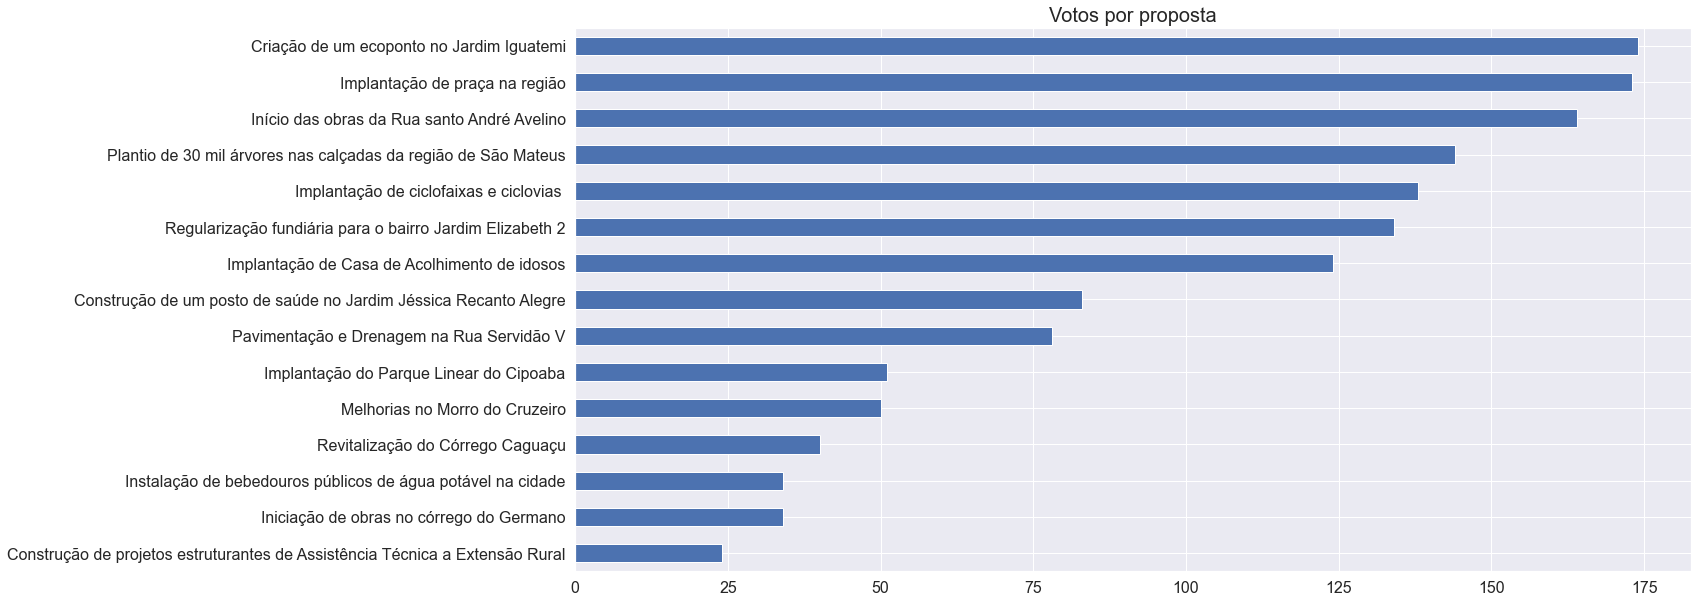

In [31]:
ax = resultado_eleicao.sort_values(by='count',ascending=True).plot.barh(
                                                                legend=False, 
                                                                xlabel='', 
                                                                figsize=(20,10),
                                                                fontsize=16)
plt.title('Votos por proposta', fontsize=20)

A visualização acima permite notar que a diferença entre algumas propostas no ranking é bem pequena.

Abaixo, calculamos essa diferença.

In [32]:
def votos_a_mais(df):
    
    df = df.copy()
    
    df['votos_a_mais'] = 0
    df.reset_index(inplace=True)#coloca indice numerico
    
    for i, row in df.iterrows():
        #garante que nao é o último colocado
        if i<(len(df)-1):
            
            dif = row['count'] - df.loc[i+1, 'count']
            df.loc[i, 'votos_a_mais']+=dif
    
    #retorna indice com titulos das propostas
    df.set_index(df['Título'], inplace=True)
    df.drop('Título', axis=1, inplace=True)
    
    return df

In [33]:
resultado_eleicao = votos_a_mais(resultado_eleicao)

In [34]:
resultado_eleicao

,count,votos_a_mais
Título,,
Criação de um ecoponto no Jardim Iguatemi,174,1
Implantação de praça na região,173,9
Início das obras da Rua santo André Avelino,164,20
Plantio de 30 mil árvores nas calçadas da região de São Mateus,144,6
Implantação de ciclofaixas e ciclovias,138,4
Regularização fundiária para o bairro Jardim Elizabeth 2,134,10
Implantação de Casa de Acolhimento de idosos,124,41
Construção de um posto de saúde no Jardim Jéssica Recanto Alegre,83,5
Pavimentação e Drenagem na Rua Servidão V,78,27


Vemos que, de fato, a diferença de colocação entre algumas propostas é de apenas 1 voto! Enquanto em outras essa diferença é um pouco maior.
Há também um empate, mas em colocações mais baixas (a penúltima e a antepenúltima colocada), de modo que ambas as propostas empatadas não se qualificaram.

Abaixo visualizamos essas diferenças, junto com o total de votos.

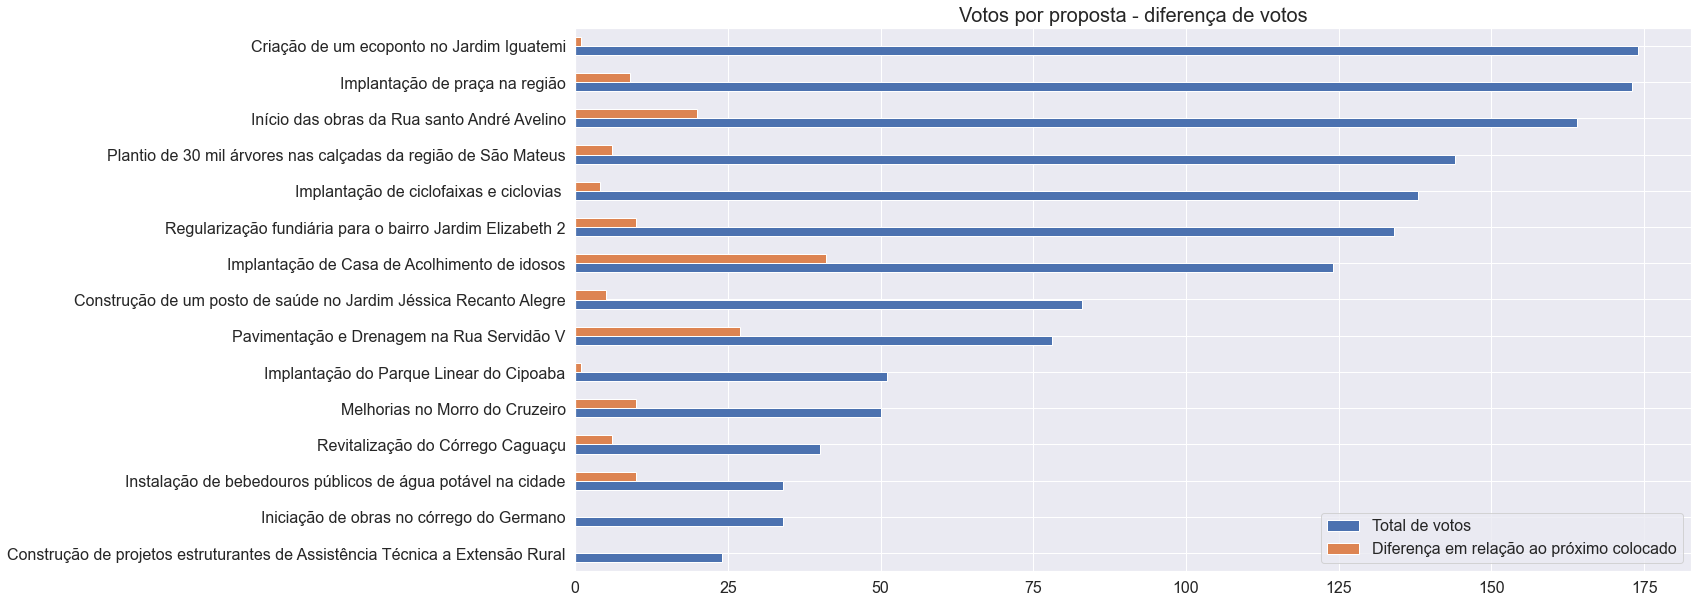

In [35]:
ax = resultado_eleicao.sort_values(by='count',ascending=True).plot.barh(
                                                                legend=True, 
                                                                xlabel='', 
                                                                figsize=(20,10),
                                                                fontsize=16)
ax.legend(['Total de votos', 'Diferença em relação ao próximo colocado'], fontsize=16)
titulo = plt.title('Votos por proposta - diferença de votos', fontsize=20)

O histograma abaixo nos permite verificar que, de fato, a maior parte das propostas difere da classificada seguinte em no máximo 10 votos.
No entanto, há três propostas que possuem maior diferença, duas entre 20 e 30 votos, e apenas uma com pouco mais de 40 votos de diferença.

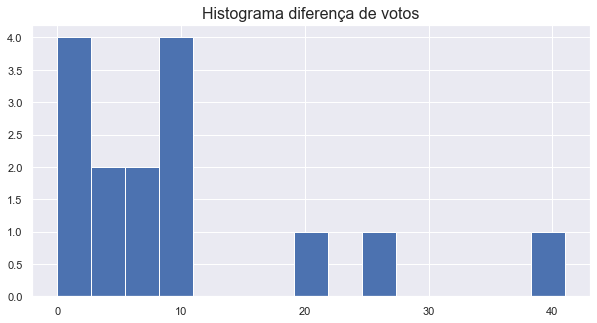

In [36]:
ax = resultado_eleicao['votos_a_mais'].hist(figsize=(10,5), bins=15)
titulo = ax.set_title('Histograma diferença de votos', fontsize=16)


Vamos estudar melhor quando ocorrem esses "picos"" de diferença entre os votos.

A seguir, criamos a coluna "posição" e utilizamos ela para visualizar a evolução do total de votos em relação à evolução da diferença de votos entre uma proposta e a proposta colocada logo abaixo dela.  

In [37]:
posicao = list(range(1, len(resultado_eleicao)+1))
resultado_eleicao['posicao'] = posicao

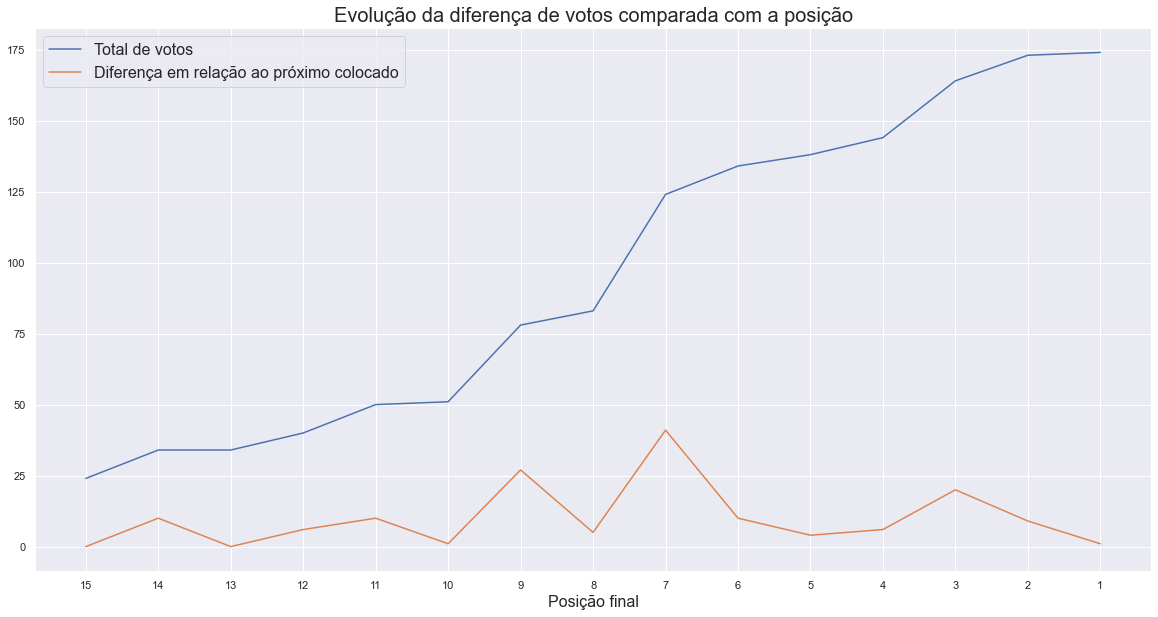

In [38]:
ax = resultado_eleicao\
.set_index('posicao')\
.plot.line(figsize=(20, 10))
ax.legend(['Total de votos', 'Diferença em relação ao próximo colocado'], fontsize=16)
ax.invert_xaxis()
ax.set_title('Evolução da diferença de votos comparada com a posição', fontsize=20)
plt.xlabel('Posição final', fontsize=16)
ticks = plt.xticks(resultado_eleicao['posicao'])

Como mostra a visualização acima, e como se pode comprovar abaixo, os dois picos na diferença entre votos ocorrem justamente quando há mudanças de patamar no total de votos geral recebido pelas propostas.

Assim, enquanto da 15ª para a 10ª posição a média de votos é em torno de 40, nas posiçoes 8 e 9 essa média vai para 80 votos.

Da sétima posição até chegar às 3 primeiras colocadas, a média de votos salta para 150 (é aqui que há a diferença de 40 votos, entre a sétima e a oitava posição). 

Por fim, ao chegarmos nas três primeiras colocadas, ocorre o terceiro salto significativo na diferença de votos (20 votos entre a 3ª e a 4ª colocadas).

As médias estão calculadas abaixo:

In [39]:
media_10_15 = round(resultado_eleicao[resultado_eleicao['posicao']>9]['count'].mean(), 2)
media_8_9 = round(resultado_eleicao[resultado_eleicao['posicao'].isin([8, 9])]['count'].mean(), 2)
media_7_3 = round(resultado_eleicao[(resultado_eleicao['posicao']<8)&(resultado_eleicao['posicao']>3)]['count'].mean())
media_3_1 = round(resultado_eleicao[resultado_eleicao['posicao']<4]['count'].mean(), 2)

In [40]:
media_10_15

38.83

In [41]:
media_8_9

80.5

In [42]:
media_7_3

135

In [43]:
media_3_1

170.33

Tudo indica que não há uma disparidade muito grande entre as votações das propostas, e que a disparidade existente diz respeito mais a um aumento da competitividade entre propostas mais bem colocadas, com chances de ganhar, do que a outras razões. Com efeito, a disparidade maior estar entre a 7º e a 8º posição tendo a confirmar o relato dos munícipes: de que as propostas que encontram-se nessa posiçao foram ultrapassadas por outras duas ao final do pleito.

Isso tende a indicar que houve um esforço final grande das propostas colocadas na 4º e 5º posição para se classificarem. Isso é algo que é comum vermos em corridas de longa distância, quando o corredor que estava em primeiro lugar ao longo de boa parte da corrida, logo ao final é ultrapassado por aquele que estavam em segundo, ou mesmo terceiro, e que faz um esforço final para ganhar.

A seção a seguir busca verificar essa hipótese, ao observar a evolução da votação ao longo do tempo.

### Evolução da votação


Nessa seção iremos explorar a evolução da votação por proposta ao longo do tempo para a Subprefeitura de São Mateus.

Abaixo, criamos uma coluna com a data do voto e, em seguida, agrupamos os dados por data e por título da proposta.

In [44]:
sao_mateus['dt_voto'] = sao_mateus['Data do voto'].apply(pd.to_datetime, dayfirst = True)

In [45]:
votos_por_dia = sao_mateus.groupby(['Título', 'dt_voto']).count()[['count']].reset_index()
votos_por_dia.head()

,Título,dt_voto,count
0,Construção de projetos estruturantes de Assist...,2021-06-28,1
1,Construção de projetos estruturantes de Assist...,2021-06-29,1
2,Construção de projetos estruturantes de Assist...,2021-07-02,1
3,Construção de projetos estruturantes de Assist...,2021-07-07,1
4,Construção de projetos estruturantes de Assist...,2021-07-08,2


A função a seguir calcula, para cada proposta, os valores acumulados ao longo dos dias.

Por exemplo: se no dia 16/07 a proposta tinha 10 votos, e no dia 17/07 ela recebeu mais 5, o total acumulado para o dia 17/07 será 10+5 = 15 votos.

In [46]:
def calc_valores_acumulados_por_proposta(df):
    '''Calcula os valores acumulados por proposta. A coluna 
    count deve conter o resultado da contagem de algum agrupamento'''
    
    df = df.copy()
    
    df['acumulado'] = 0
    titulo = df.iloc[0]['Título']
    acumulado = df.iloc[0]['count']

    for i, row in df.iterrows():
        novo_titulo = row['Título']
        if titulo == novo_titulo:
            acumulado+=row['count']
            df.loc[i, 'acumulado'] = acumulado
        else:
            acumulado=row['count']
            df.loc[i, 'acumulado'] = acumulado
            titulo = novo_titulo
            
            
    return df

In [47]:
votos_por_dia = calc_valores_acumulados_por_proposta(votos_por_dia)

A seguir verificamos se a função funcionou. Para isso selecionamos uma proposta aleatoria, visualizamos os dados para ela, e verificamos se a soma da contagem de votos para essa proposta é igual ao maior valor acumulado para ela.

In [48]:
prop_aleatoria = random.choice(votos_por_dia['Título'].unique())
votos_por_dia_prop_aleatoria = votos_por_dia[votos_por_dia['Título']==prop_aleatoria]
votos_por_dia_prop_aleatoria

,Título,dt_voto,count,acumulado
73,Implantação de ciclofaixas e ciclovias,2021-06-25,4,4
74,Implantação de ciclofaixas e ciclovias,2021-06-26,2,6
75,Implantação de ciclofaixas e ciclovias,2021-06-27,2,8
76,Implantação de ciclofaixas e ciclovias,2021-06-28,11,19
77,Implantação de ciclofaixas e ciclovias,2021-06-29,5,24
78,Implantação de ciclofaixas e ciclovias,2021-07-01,3,27
79,Implantação de ciclofaixas e ciclovias,2021-07-02,1,28
80,Implantação de ciclofaixas e ciclovias,2021-07-03,1,29
81,Implantação de ciclofaixas e ciclovias,2021-07-06,2,31
82,Implantação de ciclofaixas e ciclovias,2021-07-07,8,39


In [49]:
votos_por_dia_prop_aleatoria['count'].sum() == votos_por_dia_prop_aleatoria['acumulado'].max()

True

Vemos que a função funcionou corretamente. Agora, para que possamos desenvolver mais facilmente as visualizações de dados, vamos pivotar a tabela, fazendo com que cada proposta seja uma coluna diferente, e os valores sejam os valores acumulados para cada dia para cada proposta.

In [50]:
votos_por_dia_cols = votos_por_dia.pivot(index='dt_voto', columns='Título', values='acumulado')
votos_por_dia_cols.head()

Título,Construção de projetos estruturantes de Assistência Técnica a Extensão Rural,Construção de um posto de saúde no Jardim Jéssica Recanto Alegre,Criação de um ecoponto no Jardim Iguatemi,Implantação de Casa de Acolhimento de idosos,Implantação de ciclofaixas e ciclovias,Implantação de praça na região,Implantação do Parque Linear do Cipoaba,Iniciação de obras no córrego do Germano,Instalação de bebedouros públicos de água potável na cidade,Início das obras da Rua santo André Avelino,Melhorias no Morro do Cruzeiro,Pavimentação e Drenagem na Rua Servidão V,Plantio de 30 mil árvores nas calçadas da região de São Mateus,Regularização fundiária para o bairro Jardim Elizabeth 2,Revitalização do Córrego Caguaçu
dt_voto,,,,,,,,,,,,,,,
2021-06-25,NaN,2.0,10.0,5.0,4.0,17.0,2.0,4.0,NaN,NaN,NaN,2.0,6.0,NaN,1.0
2021-06-26,NaN,4.0,13.0,NaN,6.0,22.0,NaN,5.0,NaN,13.0,NaN,NaN,7.0,14.0,NaN
2021-06-27,NaN,7.0,27.0,11.0,8.0,38.0,5.0,7.0,1.0,15.0,6.0,5.0,10.0,15.0,5.0
2021-06-28,2.0,19.0,58.0,27.0,19.0,73.0,10.0,11.0,3.0,16.0,9.0,7.0,18.0,16.0,8.0
2021-06-29,3.0,27.0,93.0,42.0,24.0,106.0,11.0,13.0,5.0,23.0,12.0,11.0,27.0,20.0,13.0


Percebemos que há muitos valores vazios. Isso ocorre pois a proposta referente à coluna com o valor vazio não recebeu nenhuma votação no dia representado pela linha. Como estamos tratando de valores acumulados, os valores vazios deverão então manter o valor acumulado do dia anterior (dado que nenhum voto foi recebido). A função abaixo implementa isso.

In [51]:
def preencher_vazios_acumulado(df):
    
    df = df.copy()
    dias = df.index
    df.reset_index(drop=True, inplace=True)

    for i, row in df.iterrows():
        for col in df.columns:
            if pd.isnull(row[col]):
                if i==0:
                    df.loc[i, col] = 0
                else:
                    df.loc[i, col] = df.loc[i-1, col]
    
    df.set_index(dias, inplace=True)
    
    return df

In [52]:
votos_por_dia_cols = preencher_vazios_acumulado(votos_por_dia_cols)
votos_por_dia_cols.head()

Título,Construção de projetos estruturantes de Assistência Técnica a Extensão Rural,Construção de um posto de saúde no Jardim Jéssica Recanto Alegre,Criação de um ecoponto no Jardim Iguatemi,Implantação de Casa de Acolhimento de idosos,Implantação de ciclofaixas e ciclovias,Implantação de praça na região,Implantação do Parque Linear do Cipoaba,Iniciação de obras no córrego do Germano,Instalação de bebedouros públicos de água potável na cidade,Início das obras da Rua santo André Avelino,Melhorias no Morro do Cruzeiro,Pavimentação e Drenagem na Rua Servidão V,Plantio de 30 mil árvores nas calçadas da região de São Mateus,Regularização fundiária para o bairro Jardim Elizabeth 2,Revitalização do Córrego Caguaçu
dt_voto,,,,,,,,,,,,,,,
2021-06-25,0.0,2.0,10.0,5.0,4.0,17.0,2.0,4.0,0.0,0.0,0.0,2.0,6.0,0.0,1.0
2021-06-26,0.0,4.0,13.0,5.0,6.0,22.0,2.0,5.0,0.0,13.0,0.0,2.0,7.0,14.0,1.0
2021-06-27,0.0,7.0,27.0,11.0,8.0,38.0,5.0,7.0,1.0,15.0,6.0,5.0,10.0,15.0,5.0
2021-06-28,2.0,19.0,58.0,27.0,19.0,73.0,10.0,11.0,3.0,16.0,9.0,7.0,18.0,16.0,8.0
2021-06-29,3.0,27.0,93.0,42.0,24.0,106.0,11.0,13.0,5.0,23.0,12.0,11.0,27.0,20.0,13.0


Como podemos ver acima, o preenchimento funcionou corretamente.

Agora, vamos construir um gráfico que nos permitirá visualizar melhor o avanço da votação por dia. 

### Evolução da votação por dia

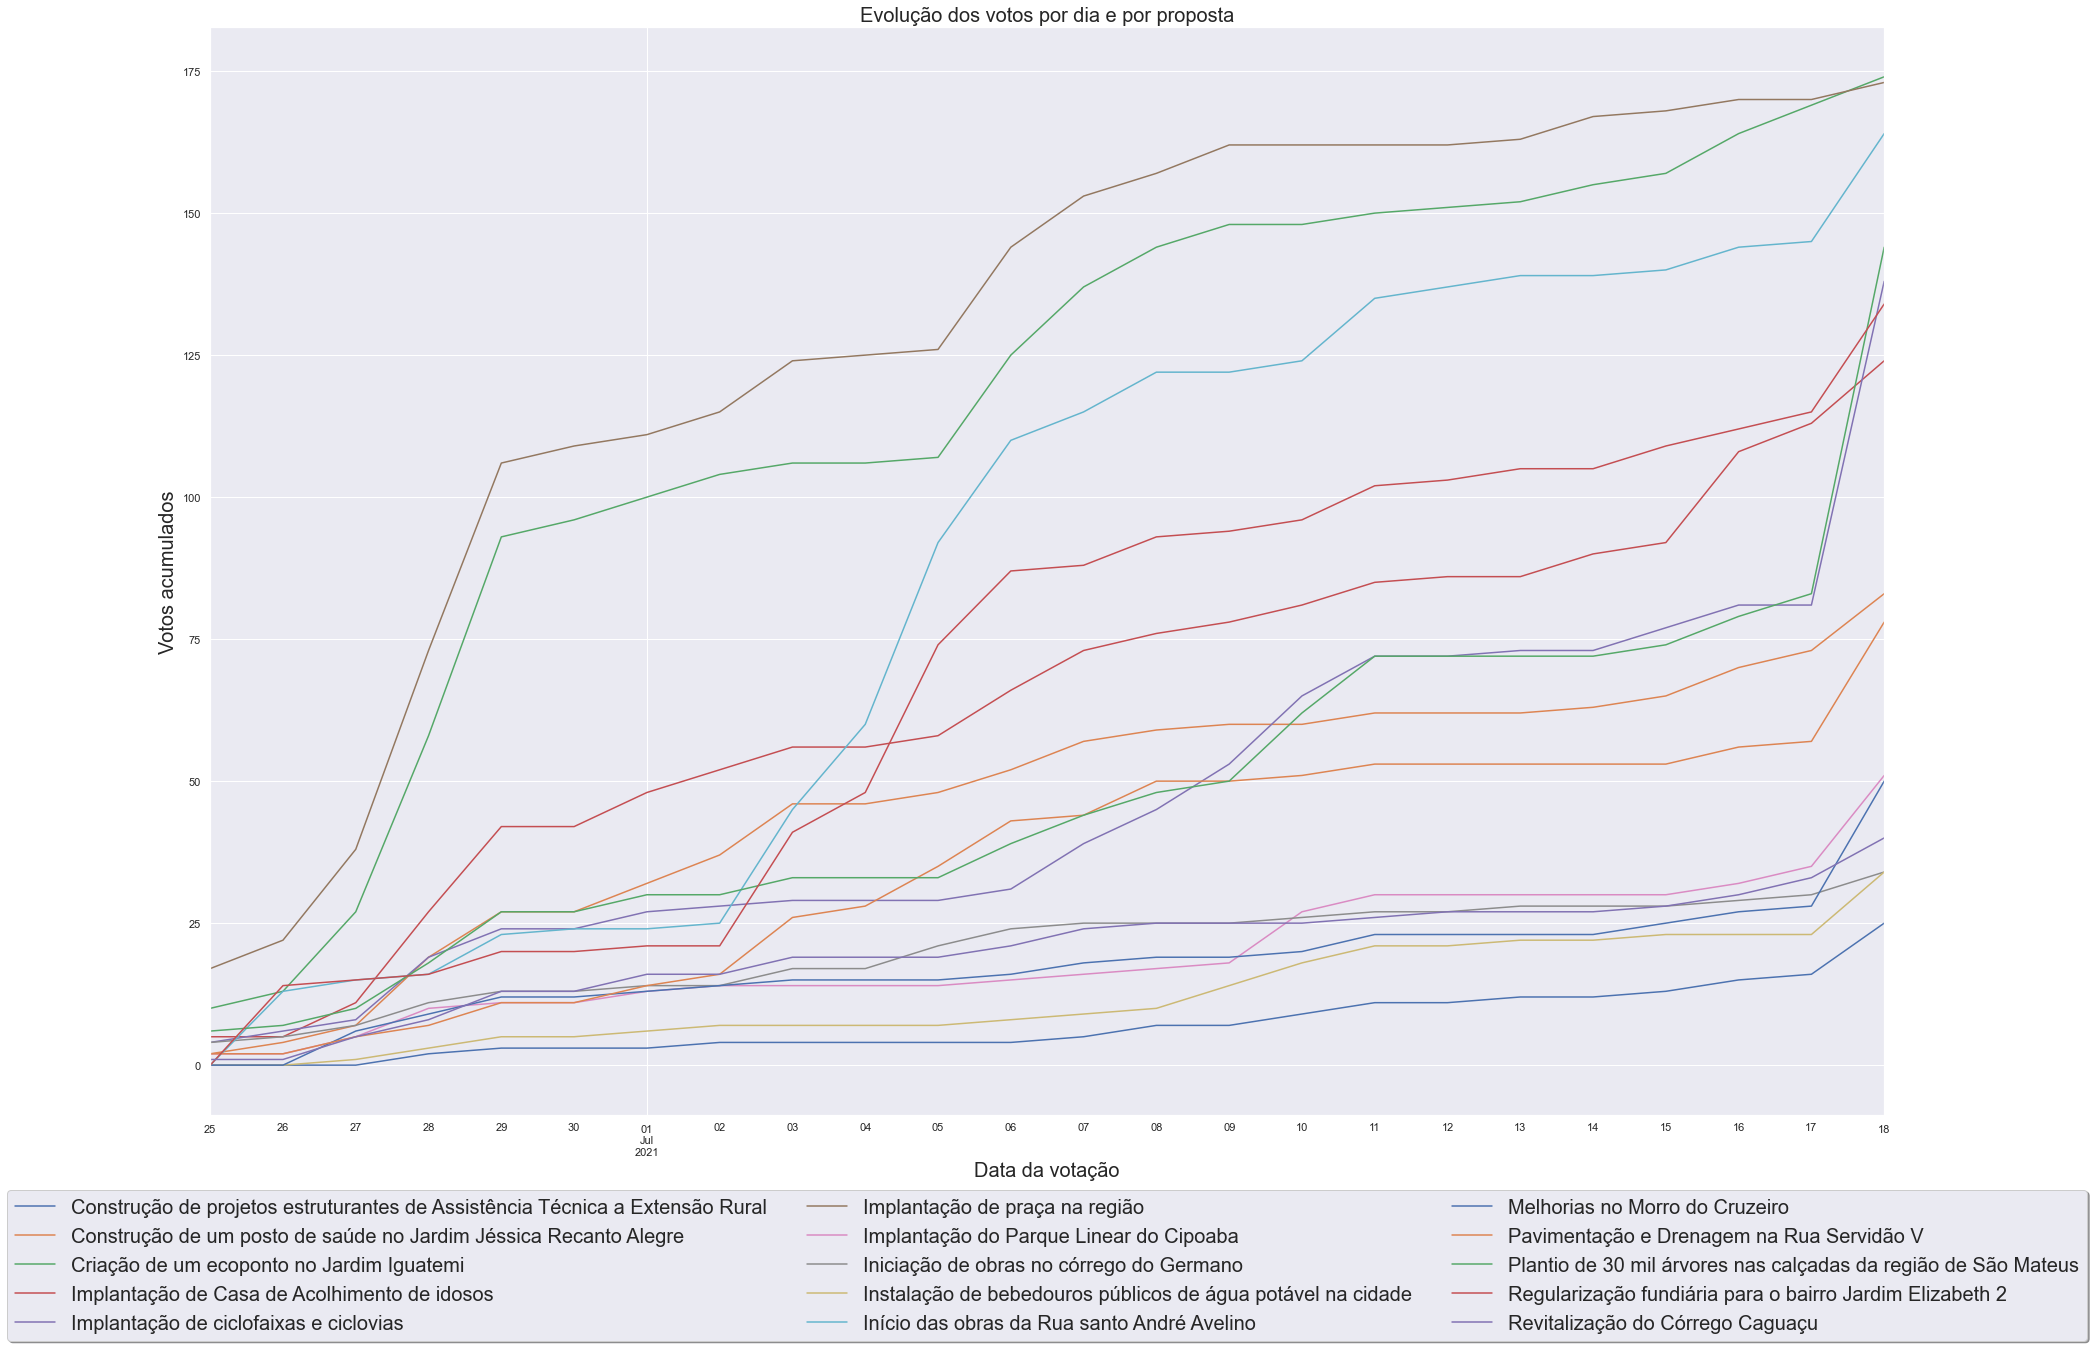

In [53]:
ax = votos_por_dia_cols.plot(figsize=(30, 20))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
          fancybox=True, shadow=True, ncol=3, fontsize=20)
ax.set_xlabel('Data da votação', fontsize=20)
ax.set_ylabel('Votos acumulados', fontsize=20)
title = ax.set_title('Evolução dos votos por dia e por proposta', fontsize=20)

ax.get_figure().savefig('Evolucao_dos_votos_por_dia_e_proposta.png', bbox_inches='tight')

Os dados gerais mostram que a votaçaõ foi bastante acirrada, sobretudo ao final.

Vemos por exemplo que a proposta que ficou como primeira colocada durante toda a votação foi ultrapassada pela segunda colocada aos "45 do segundo tempo". Com efeito, houveram várias outras ultrapassagens no último dia, sobretudo entre as últimas colocadas. Isso indica que o "esforço final" foi uma estratégia buscada por vários grupos de eleitores.

Vamos agora observar com detalhes as propostas mencionadas pelos munícipes. Trata-se das propostas classificadas entre a quarta e a sétima posição.

Como podemos ver no gráfico acima, as propostas que hoje estão na quarta e quinta posição estiveram, desde o dia 05 de julho, consistentemente na sexta e sétima posições. O mesmo ocorreu com aquelas que estão hoje na sexta e sétima, que estiveram consistentemente na quarta e quinta posição. Essa situação mudou drasticamente no último dia.

Vamos ver abaixo com mais detalhes:

In [54]:
quarta_a_setima_colocadas = resultado_eleicao[resultado_eleicao['posicao'].isin([4,5,6,7])].index

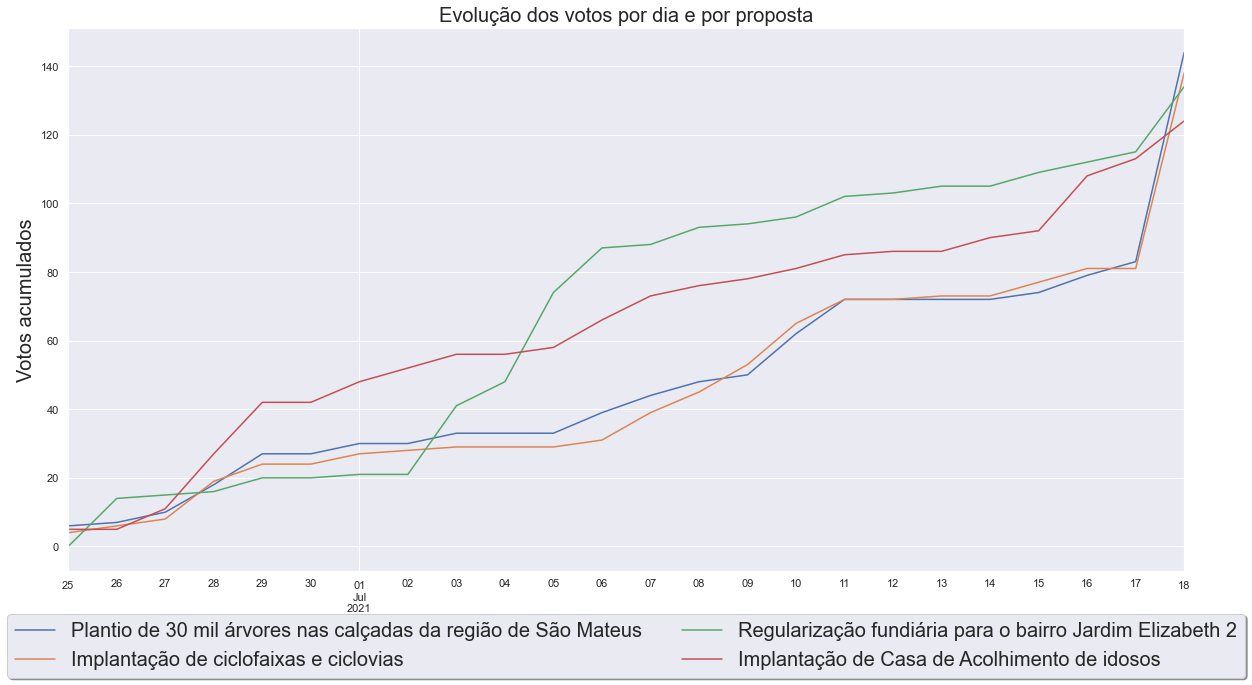

In [55]:
ax = votos_por_dia_cols[quarta_a_setima_colocadas].plot(figsize=(20, 10))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
          fancybox=True, shadow=True, ncol=2, fontsize=20)
ax.set_xlabel('Data da votação', fontsize=20)
ax.set_ylabel('Votos acumulados', fontsize=20)
title = ax.set_title('Evolução dos votos por dia e por proposta', fontsize=20)

ax.get_figure().savefig('Evolucao_dos_votos_por_dia_e_proposta_quarta_a_setima.png', bbox_inches='tight')

Com efeito, vemos que houve uma ultrapassagem justamente no último dia! Isso tende a confirmar o que os munícipes narraram.

Vamos olhar agora com mais detalhes o que ocorreu neste último dia.

### Evolução da Votação no Último Dia

Como alguns questionamentos de munícipes levantam suspeite de fraudes na votação, em primeiro lugar vamos checar se houve algum problema na quantidade de votos por munícipe no último dia.

O Participe+ possui uma regra que impede a votação de mais de cinco propostas por usuário por Subprefeitura.

Na célula abaixo, vamos checar se esse impedimento de fato ocorreu:

In [56]:
votos_ultimo_dia = sao_mateus[sao_mateus['Data do voto'] =='18/07/21'].copy().reset_index(drop=True)

votos_por_pessoa_ultimo_dia = votos_ultimo_dia.groupby('documento_hash').count()[['count']]\
.sort_values(by='count', ascending=False)

print(f'O máximo de votos por pessoa foi {votos_por_pessoa_ultimo_dia.max()[0]}')

O máximo de votos por pessoa foi 5


Abaixo, plotamos o histograma da quantidade de votos por pessoa. 

Como podemos ver, a maior parte dos votos foi abaixo de 3 votos por pessoa (que é o valor central).

Com efeito, a distribuição se assemelha muito a uma distribuição normal, com a única exceção que há mais pessoas com 5 votos do que com 4. Isso faz um certo sentido, pois as pessoas que votam em várias propostas (e não em apenas uma ou duas favoritas) tendem a querer usar todos os seus votos.

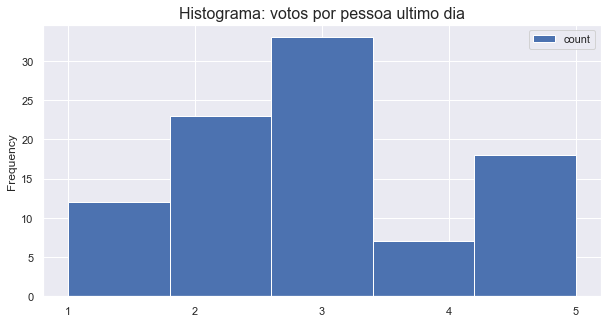

In [57]:
ax = votos_por_pessoa_ultimo_dia.plot.hist(figsize=(10,5), bins=5)
title = ax.set_title('Histograma: votos por pessoa ultimo dia', fontsize=16)
ticks = ax.set_xticks(list(range(1,6)))

Comprovado que não houveram mais de cinco votos por pessoa, vamos agora explorar a evolução dos votos ao longo das horas do dia.

Abaixo criamos uma coluna de tipo "Date Time" que é um objeto que representa uma data (e horário) com bastante precisão.

Usaremos essa coluna nas próximas etapas.

In [58]:
votos_ultimo_dia['date_time'] = votos_ultimo_dia['Data do voto'] + '-' + votos_ultimo_dia['Horário']
votos_ultimo_dia['date_time'] = pd.to_datetime(votos_ultimo_dia['date_time'], dayfirst=True)

Abaixo, selecionamos apenas as horas, para observarmos a evolução neste nível de agregação.

In [59]:
votos_ultimo_dia['hora_do_voto'] = votos_ultimo_dia['date_time'].apply(lambda x: x.hour)

Como mostra o histograma abaixo, parece haver grande concentração de votos após as 22h (bem ao final do pleito!).

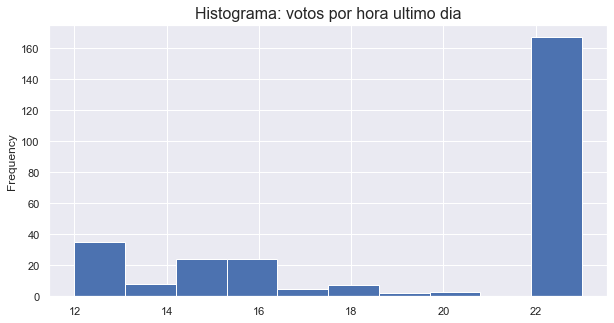

In [60]:
ax = votos_ultimo_dia['hora_do_voto'].plot.hist(figsize=(10,5))
title = ax.set_title('Histograma: votos por hora ultimo dia', fontsize=16)

A seguir plotamos os mesmos gráficos que plotamos anteriormente, mas agora com foco nos votos que foram acumulados <b> apenas durante o último dia </b>

In [61]:
votos_por_hora = votos_ultimo_dia.groupby(['Título', 'hora_do_voto']).count()[['count']].reset_index()
votos_por_hora = calc_valores_acumulados_por_proposta(votos_por_hora)
votos_por_hora_cols = votos_por_hora.pivot(index='hora_do_voto', columns='Título', values='acumulado')
votos_por_hora_cols = preencher_vazios_acumulado(votos_por_hora_cols)

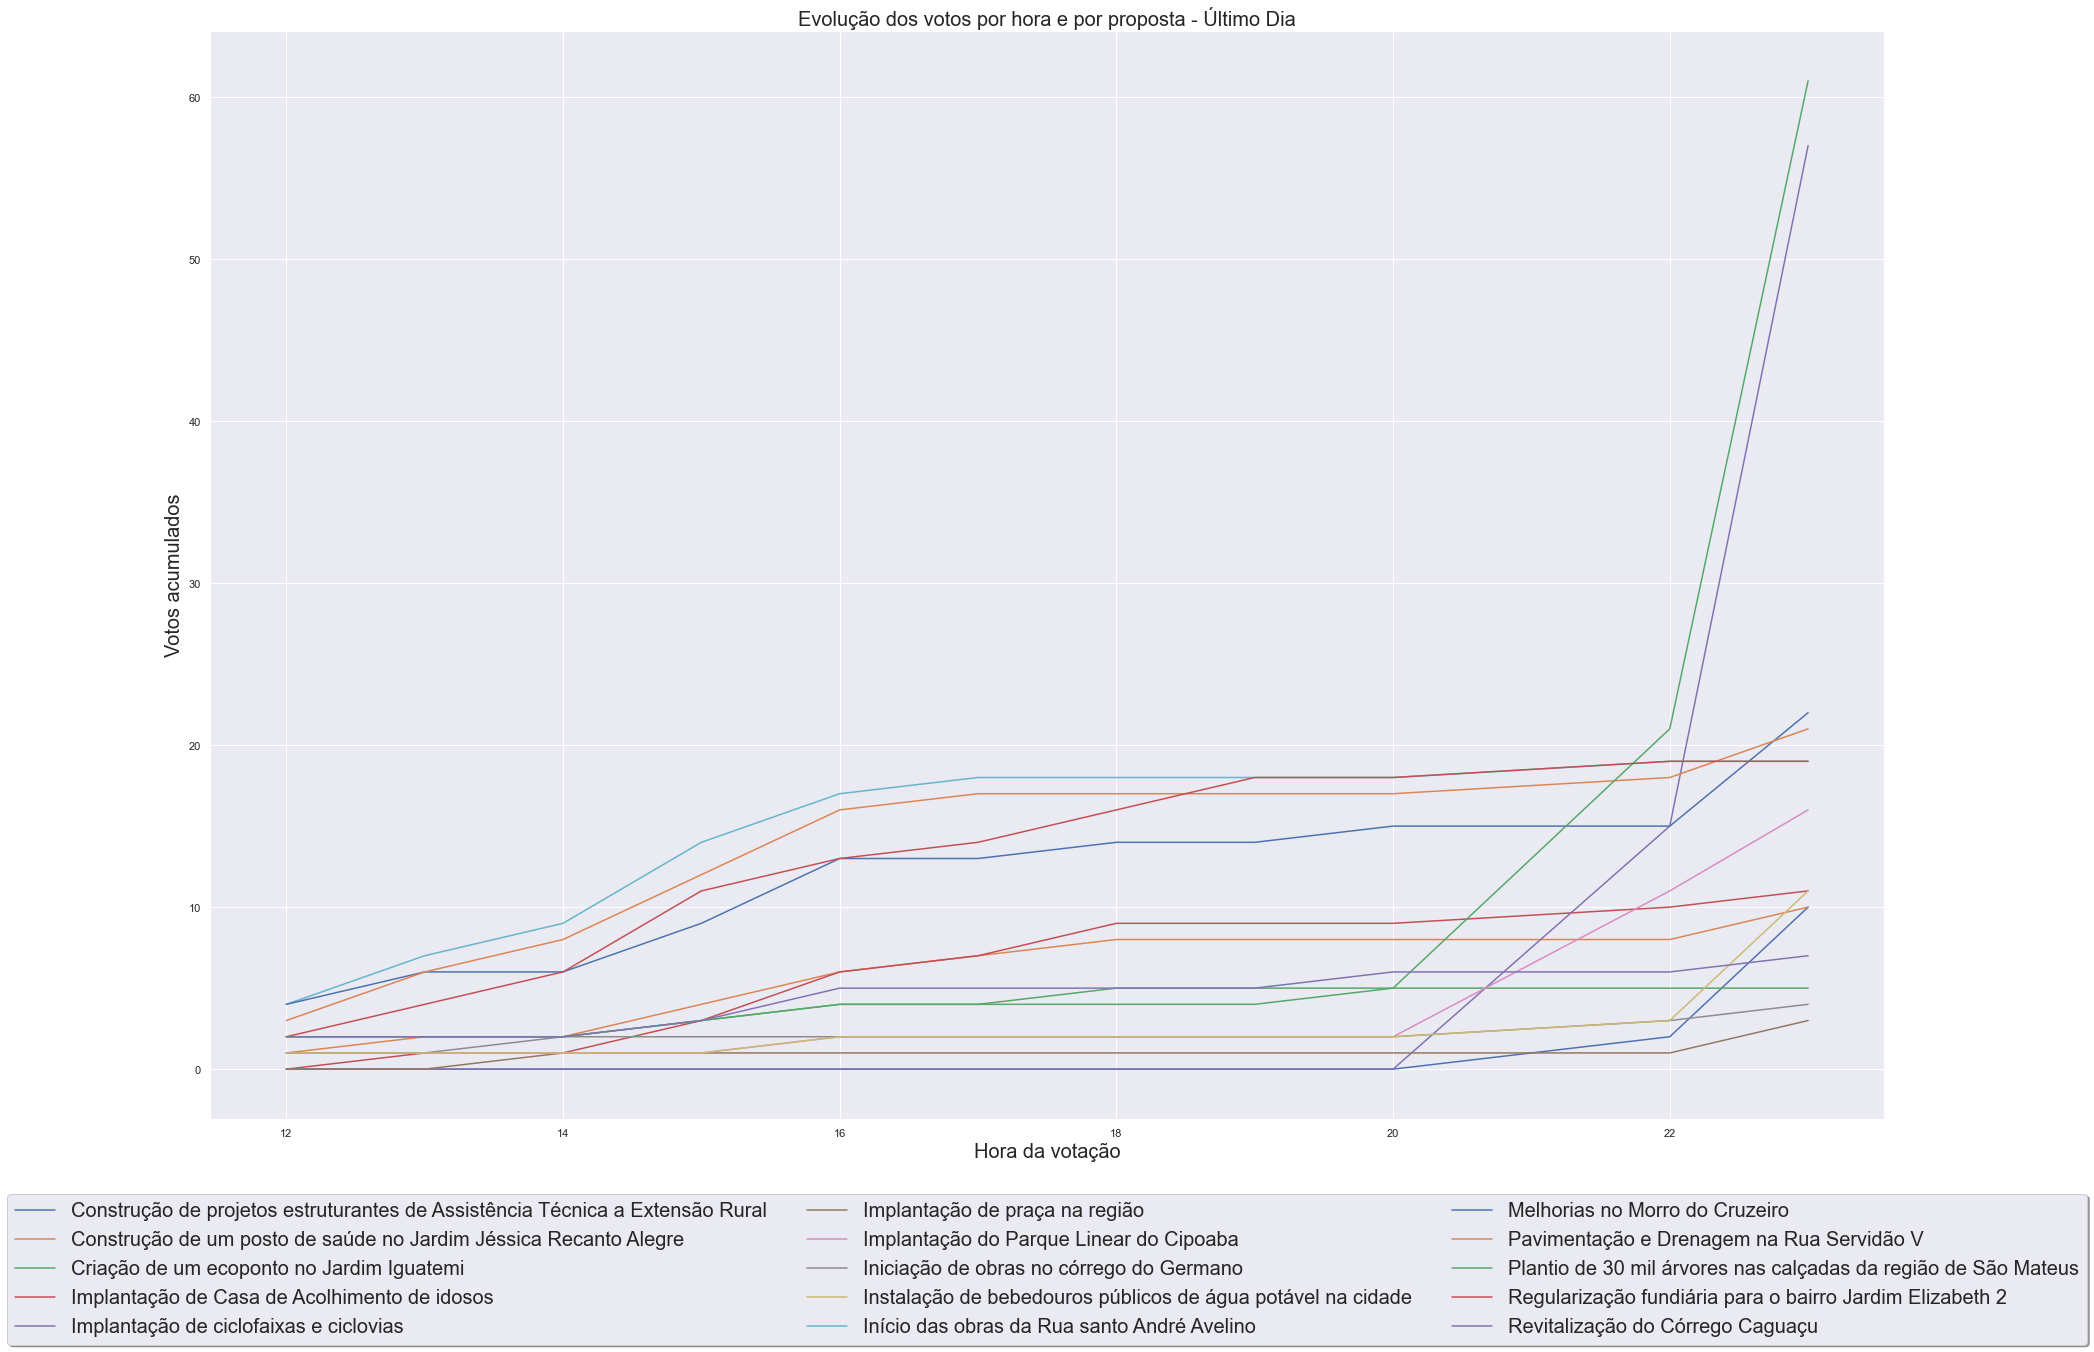

In [62]:
ax = votos_por_hora_cols.plot(figsize=(30, 20))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
          fancybox=True, shadow=True, ncol=3, fontsize=20)
ax.set_xlabel('Hora da votação', fontsize=20)
ax.set_ylabel('Votos acumulados', fontsize=20)
title = ax.set_title('Evolução dos votos por hora e por proposta - Último Dia', fontsize=20)

ax.get_figure().savefig('Evolucao_dos_votos_por_hora_e_proposta_último_dia.png', bbox_inches='tight')

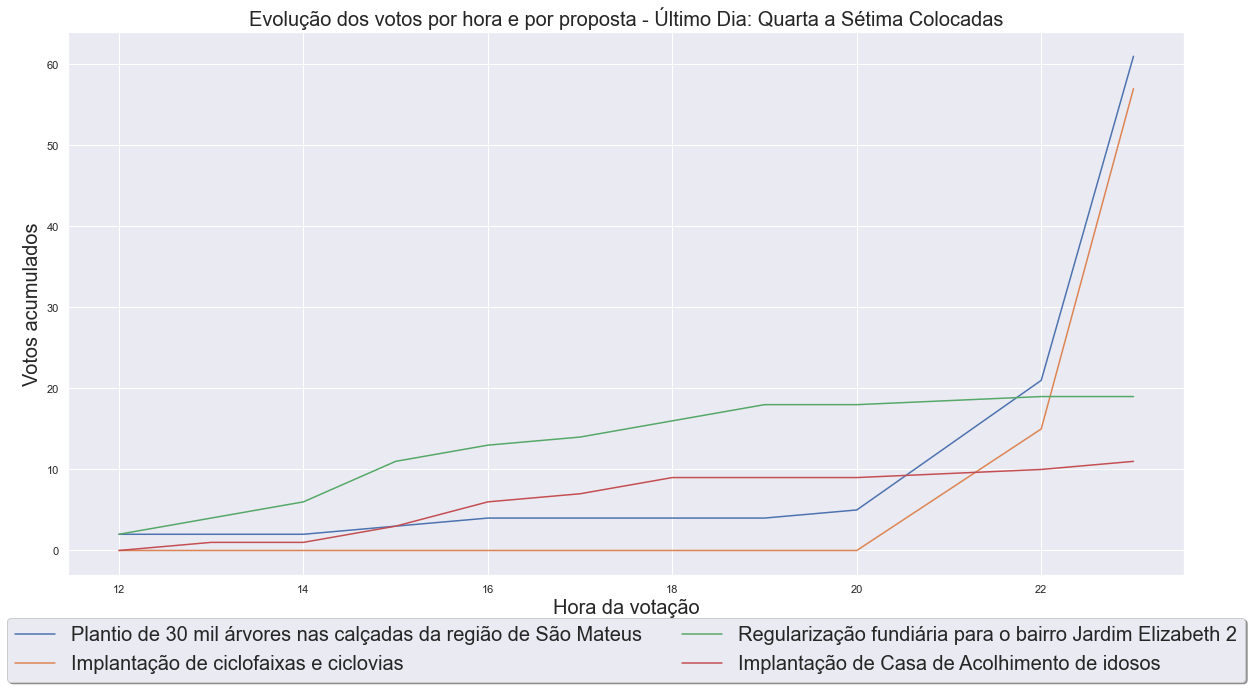

In [63]:
ax = votos_por_hora_cols[quarta_a_setima_colocadas].plot(figsize=(20, 10))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
          fancybox=True, shadow=True, ncol=2, fontsize=20)
ax.set_xlabel('Hora da votação', fontsize=20)
ax.set_ylabel('Votos acumulados', fontsize=20)
title = ax.set_title('Evolução dos votos por hora e por proposta - Último Dia: Quarta a Sétima Colocadas', fontsize=20)

ax.get_figure().savefig('Evolucao_dos_votos_por_hora_e_proposta_último_dia_quarta_a_setima.png', bbox_inches='tight')

Como podemos ver, os dados confirmam o relato dos munícipes!

De fato, houve um aumento expressivo nos votos das propostas que hoje ocupam a 4ª e 5ª posição na hora final do pleito.

Ao que tudo indica, esse aumento não foi acompanhado pelas outras duas propostas, que perderam suas posições porque quase não tiveram novos votos nas horas finais. 

Tudo indica que seus apoiadores tenham acreditado que haviam vencido e reduziram seus esforços para angariar novos votos.

Vamos observar com mais atenção, agora apenas as últimas duas horas do pleito.

### Evolução da votação: horas finais

Abaixo selecionamos apenas os votos de São Mateus após as 22h.

Em seguida, verificamos a distribuição total de votos por proposta no período.

Como podemos ver, as proposta da 4ª e 5ª posição tiveram uma quantidade significativamente maior que as demais.

No entanto, há também diferença entre as outras proposta, havendo propostas que tiveram quantidade moderada de voots (mais de 10) até algumas propostas que quase não receberam votos (1 ou nenhum).

In [64]:
votos_depois_22 = votos_ultimo_dia[votos_ultimo_dia['hora_do_voto']>21].copy()
votos_depois_22_por_proposta = votos_depois_22.groupby(['Título']).count()[['count']].sort_values(by='count', ascending=True)

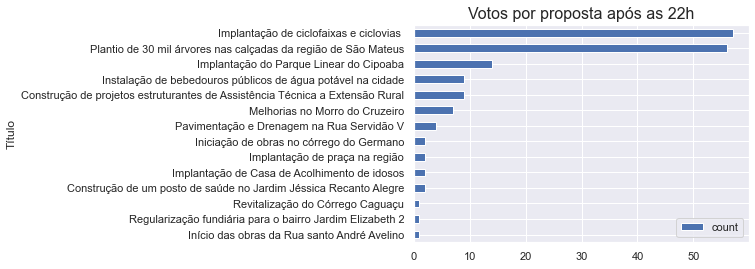

In [65]:
ax = votos_depois_22_por_proposta.plot.barh()
title = ax.set_title('Votos por proposta após as 22h', fontsize=16)

Se focarmos nas propostas em questão, vemos que as propostas que foram ultrapassadas não receberam quase nenhum voto nas últimas duas horas.

In [66]:
votos_depois_22_por_proposta.loc[quarta_a_setima_colocadas]

,count
Título,
Plantio de 30 mil árvores nas calçadas da região de São Mateus,56
Implantação de ciclofaixas e ciclovias,57
Regularização fundiária para o bairro Jardim Elizabeth 2,1
Implantação de Casa de Acolhimento de idosos,2


Antes de plotarmos a evolução dos votos nessas últimas duas horas, vamos fazer uma última checagem.

Abaixo, fazemos uma função para calcular quantas pessoas votaram em cada proposta.

Uma mesma pessoa não pode votar mais de duas vezes em uma mesma proposta. Desse modo, o <b> o total de pessoas que votaram em uma proposta deve ser igual ao total de votos que ela recebeu </b>.

Vamos verificar se isso foi o que ocorreu.

In [67]:
def calcular_quantas_pessoas_votaram(df):
    
    pessoas_unicas = {}
    
    for i, row in df.iterrows():
        proposta = row['Título']
        if proposta not in pessoas_unicas:
            pessoas_unicas[proposta]=set()
        pessoas_unicas[proposta].add(row['documento_hash'])
        
        
    
    return pd.DataFrame(
        {proposta:[len(pessoas_unicas[proposta])] for proposta in pessoas_unicas}
    ).T.rename({0:'qtd_pessoas'}, axis =1)

In [68]:
pessoas_por_prop_depois_22 = calcular_quantas_pessoas_votaram(votos_depois_22).sort_values(by='qtd_pessoas', ascending=False)

Abaixo, unimos alguns dos datasets que trabalhamos ao longo desse relatório, com o objetivo de comparar a quantidade de pessoas, o total de votos e a posição da proposta.

Como podemos ver, para todas elas, o total de votos é idêntico à quantidade de pessoas que votaram.

In [69]:
pessoas_por_prop_depois_22.loc[quarta_a_setima_colocadas].join(votos_depois_22_por_proposta)\
.join(resultado_eleicao[['posicao']])[['qtd_pessoas', 'count', 'posicao']]\
.rename({'count' : 'total_de_votos'}, axis = 1)

,qtd_pessoas,total_de_votos,posicao
Título,,,
Plantio de 30 mil árvores nas calçadas da região de São Mateus,56,56,4
Implantação de ciclofaixas e ciclovias,57,57,5
Regularização fundiária para o bairro Jardim Elizabeth 2,1,1,6
Implantação de Casa de Acolhimento de idosos,2,2,7


Feita essa checagem, vamos observar a evolução minuto a minuto nas últimas duas horas.

Caso haja uma concentração muito grande de votos em um mesmo minuto, poderems concluir que há indícios de que algum método ilegal foi utilizado (como o uso de robôs).

Caso a evolução da votação siga uma tendência mais estável ou "orgânica", podemos concluir de que houve um esforço final por parte do grupo de apoiadores para angariar maiores votos. Ou mesmo de que houve uma estratégia deliberada (e vitoriosa) de concentrar os votos nas horas finais para ludibriar seus concorrentes, que, por acreditarem estar vencendo, reduziram seus esforços.

In [70]:
votos_depois_22['minuto_do_voto'] = votos_depois_22['date_time'].apply(lambda x: x.minute if x.hour == 22 else x.minute+60)

In [71]:
#aqui checamos se o maior minuto é menor que 120, pois se fosse maior o período seria maior que duas horas
votos_depois_22['minuto_do_voto'].max()<120

True

In [72]:
votos_por_minuto = votos_depois_22.groupby(['Título', 'minuto_do_voto']).count()[['count']].reset_index()
votos_por_minuto = calc_valores_acumulados_por_proposta(votos_por_minuto)
votos_por_minuto_cols = votos_por_minuto.pivot(index='minuto_do_voto', columns='Título', values='acumulado')
votos_por_minuto_cols = preencher_vazios_acumulado(votos_por_minuto_cols)

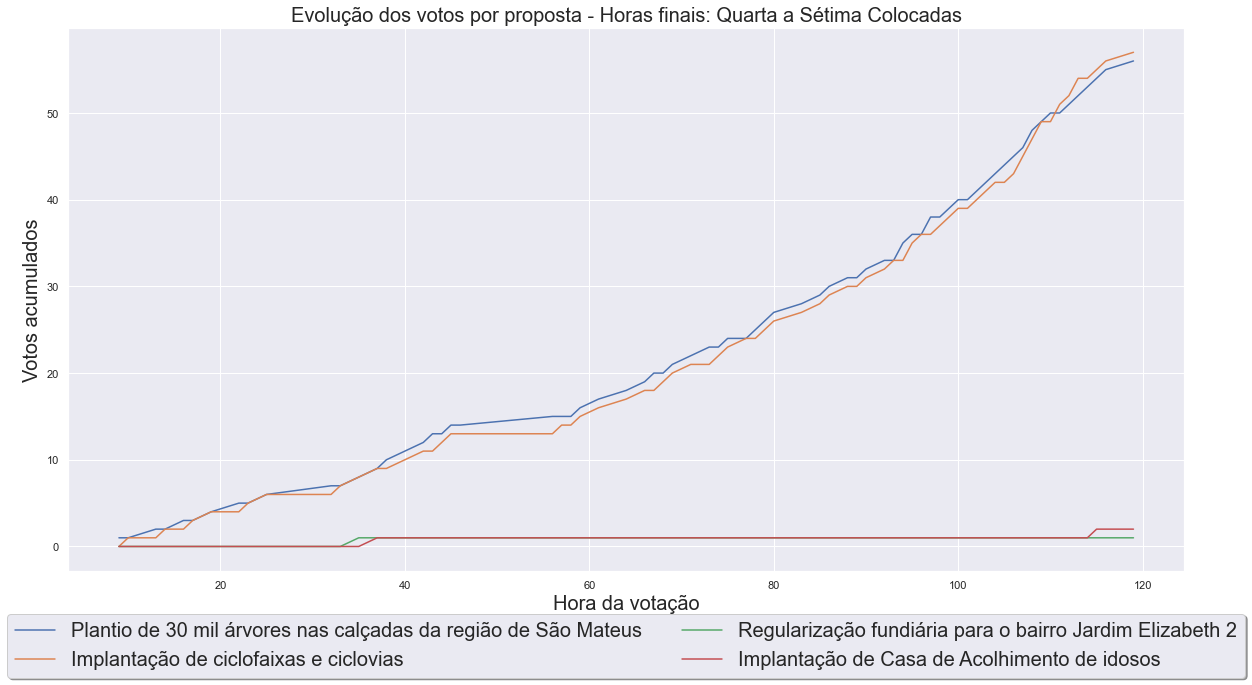

In [73]:
ax = votos_por_minuto_cols[quarta_a_setima_colocadas].plot(figsize=(20, 10))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
          fancybox=True, shadow=True, ncol=2, fontsize=20)
ax.set_xlabel('Hora da votação', fontsize=20)
ax.set_ylabel('Votos acumulados', fontsize=20)
title = ax.set_title('Evolução dos votos por proposta - Horas finais: Quarta a Sétima Colocadas', fontsize=20)

ax.get_figure().savefig('Evolucao_dos_votos_por_minuto_apos_22h_quarta_a_setima.png', bbox_inches='tight')

Como podemos ver, o gráfico acima apresenta uma tendência bastante linear de acúmulo dos votos ao longo das últimas duas horas para as propostas que hoje ocupam a 4ª e 5ª posições.

Abaixo, fazemos uma última checagem, para identificar qual foi a maior quantidade de votos que uma mesma proposta recebeu em um minuto nas duas horas finais:

In [74]:
print(f'O máximo de votos recebidos em um mesmo minuto foi: {votos_por_minuto["count"].max()}')

O máximo de votos recebidos em um mesmo minuto foi: 2


Trata-se de uma quantidade baixa e bastante razoável.

### Conclusão:

Como pudemos verificar ao estudar a evolução dos votos acumulados, houve um crescimento orgânico de votos das propostas que hoje ocupam a 4ª e a 5ª posição ao longo das horas finais do pleito. Paralelamente, as propostas que hoje ocupam a 6ª e 7ª posição quase não receberam votos nessas horas.

Assim, tudo indica que houve uma concentração de esforços dos apoiadores das propostas que hoje ocupam a quarta e quinta posição no último momento, do mesmo modo que vemos ocorrer em maratonas ou corridas de longa distância. Isso tudo nos leva a concluir que <b> não houveram fraudes nas votações </b>